# **Taller 8**
Natali André Julio Beltran CC.1098807231
\
Brayan Alejandro Murillo González CC.1007338060


Here $K(k)$ is a complete elliptic integral of the first kind and $E(k)$ is a complete elliptic integral of the second kind. For $a = 1$, $I = 3$, and $\frac{μ_0}{4π} = 1$, compute and plot

a) $A_φ(r = 1.1, θ)$ vs. $θ$\
b) $A_φ(r, θ = π∕3)$ vs. $r$

In [1]:

import numpy as np
import matplotlib.pylab as plt
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd


  Punto A\
  $Aϕ(r=1.1,θ)$ vs $θ$

In [2]:
"""Definimos las constantes del problema"""
a = 1
r = 1.1
I = 3

""" Creamos dos linspace para evaluar las funciones que dependen de θ y de ϕ """
θ = np.linspace(0.00001,np.pi/2,100)
ϕ = np.linspace(0,np.pi/2, 100  )


Término $k^2$

$$ k^2=\frac{4arsin(\theta)}{a^2+r^2+2arsin(\theta)}$$




In [3]:
""" Función para k^2, devuelve una lista de valores de k^2"""
def k_2 (θ,a,r):
  T1 = 4*a*r*np.sin(θ)
  T2 = a**2+r**2+2*a*r*np.sin(θ)
  return  T1/T2  

kk = k_2(θ,1,1.1)   # Lista de valores de k^2 para cada θ


Funciones $K(k)$ y $E(k)$


$$K(k)=\int_{0}^{\frac{\pi}{2}}\frac{d\phi}{\sqrt{1-k^2sin(\phi)}}$$


$$E(k)=\int_{0}^{\frac{\pi}{2}}\sqrt{1-k^2sin^2(\phi)}\ d\phi$$

In [4]:
k_k = lambda k, ϕ: 1/(np.sqrt(1-k*(np.sin(ϕ))**2))  # Función para los términos K(k)
E_E = lambda k, ϕ: np.sqrt(1-k*(np.sin(ϕ)**2))      # Función para los términos E(k)

Funcion del potencial para $\theta$ entre $[0,\frac{\pi}{2}]$

\
$$A_{\phi}(r,\theta)= \frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2arsin(\theta)}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2}\right)$$


In [5]:
""" Funcion del potencial """

def potencial(θ,I,a,r):

  T11 = (4*I*a)

  T12 = np.sqrt(a**2 + r**2 + 2*a*r*np.sin(θ))
  
  T1 = T11/T12

  T21 = integrate.trapz(k_k(kk,ϕ),ϕ) # Integramos con el método del trapecio

  T2 = (2-kk)

  T3 = integrate.trapz(E_E(kk,ϕ),ϕ)

  return (T1*(T2*T21-2*T3)/kk)


pot = potencial(θ,3,1,1.1)  # Calculamos el potencial para cada valor de θ de 0 a pi/2 y lo almacenamos en el array pot



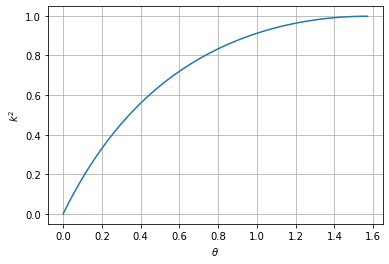

In [6]:
"""Gráfica de K^2"""
plt.plot(θ,kk)
plt.xlabel("$\\theta$")
plt.ylabel("$k^2$")
plt.grid()

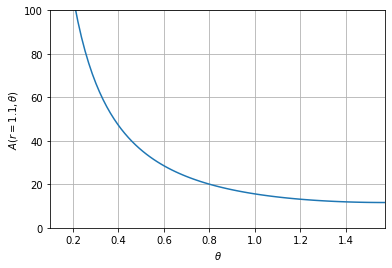

In [7]:

""" Gráfica del potencial vs θ """
plt.plot(θ,pot)
plt.xlim(0.1, np.pi/2)
plt.ylim(0,100)
plt.xlabel("$\\theta$")
plt.ylabel("$A(r=1.1, \\theta)$")
plt.grid()


In [8]:
""" Almacenamos los datos en un dataframe"""
df1 = pd.DataFrame()
df1["θ"] = θ
df1["Potencial"] = pot
df1

,θ,Potencial
0,0.000010,2.496943e+06
1,0.015877,1.552043e+03
2,0.031743,7.661935e+02
3,0.047610,5.043105e+02
4,0.063476,3.734771e+02
...,...,...
95,1.507330,1.166763e+01
96,1.523197,1.164944e+01
97,1.539063,1.163647e+01
98,1.554930,1.162870e+01


Punto B

$A_ϕ(r,θ=\frac{\pi}{4})$ vs $θ$

In [9]:
"""Definimos las constantes del problema"""
a = 1
θ = np.pi/4
I = 3

""" Creamos dos linspace para evaluar las funciones que dependen de r y de ϕ """
r = np.linspace(0.00001,10,100)
ϕ = np.linspace(0,np.pi/2, 100  )

In [10]:
kk = k_2(θ,a,r)  # Valores de k^2 para cada r entre 0 y 10
pot = potencial(θ,I,a,r) # Valores del potencial para cada r entre 0 y 10  y θ=pi/4


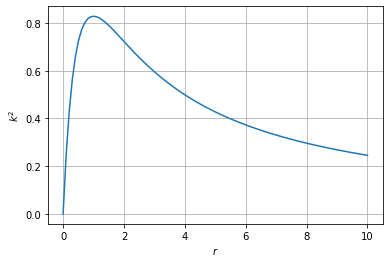

In [11]:
"""Gráfica de K^2 v r"""
plt.plot(r,kk)
plt.xlabel("$r$")
plt.ylabel("$k^2$")
plt.grid()

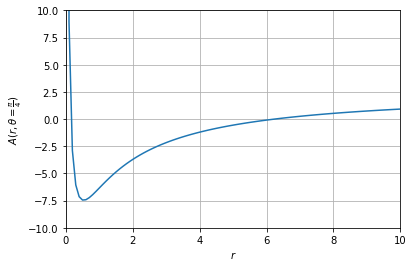

In [12]:
""" Gráfica del potencial vs θ """
plt.plot(r,pot)
plt.xlim(0,10)
plt.ylim(-10,10)
plt.xlabel("$r$")
plt.ylabel("$A(r, \\theta= \\frac{\pi}{4})$")
plt.grid()


In [ ]:
""" Almacenamos los datos en un dataframe"""
df2 = pd.DataFrame()
df2["r"] = r
df2["Potencial"] = pot
df2

,r,Potencial
0,0.00001,266882.585153
1,0.10102,8.945398
2,0.20203,-2.895088
3,0.30304,-6.056833
4,0.40405,-7.137483
...,...,...
95,9.59596,0.852621
96,9.69697,0.869957
97,9.79798,0.886966
98,9.89899,0.903658
